In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)

In [3]:
train_policy = pd.read_csv("(JOB-A-THON)train_Df64byy.csv")

In [110]:
test_policy = pd.read_csv("(JOB-A-THON)test_YCcRUnU.csv")

In [4]:
train_policy.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [111]:
test_policy.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [5]:
train_policy.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [6]:
train_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [7]:
train_policy.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [8]:
train_policy.shape

(50882, 14)

In [9]:
train_policy.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [112]:
test_policy.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [10]:
train_policy['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [11]:
train_policy['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [12]:
train_policy['Health Indicator'].fillna(train_policy['Health Indicator'].mode()[0],inplace=True)

In [13]:
train_policy['Health Indicator'].isnull().sum()

0

In [113]:
test_policy['Health Indicator'].fillna(test_policy['Health Indicator'].mode()[0],inplace=True)

In [14]:
train_policy['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [15]:
train_policy['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [16]:
train_policy.loc[train_policy['Holding_Policy_Duration']=='14+'].head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
40,41,C2,1036,Owned,Individual,64,64,No,X1,14+,3.0,3,19830.0,0
47,48,C4,4373,Rented,Individual,71,71,No,X1,14+,3.0,18,15678.0,0
55,56,C2,1016,Owned,Individual,48,48,No,X1,14+,3.0,21,15180.0,1


In [17]:
train_policy['Holding_Policy_Duration'] = train_policy['Holding_Policy_Duration'].replace('14+','15.0')

In [116]:
test_policy['Holding_Policy_Duration'] = test_policy['Holding_Policy_Duration'].replace('14+','15.0')

In [18]:
train_policy['Holding_Policy_Duration'].fillna(value=train_policy['Holding_Policy_Duration'].mode()[0],inplace=True)

In [19]:
train_policy['Holding_Policy_Duration'].isnull().sum()

0

In [20]:
train_policy['Holding_Policy_Duration'].dtype

dtype('O')

In [21]:
train_policy['Holding_Policy_Duration'] = train_policy['Holding_Policy_Duration'].astype(float)

In [114]:
test_policy['Holding_Policy_Duration'].fillna(value=test_policy['Holding_Policy_Duration'].mode()[0],inplace=True)

In [115]:
test_policy['Holding_Policy_Duration'].unique()

array(['6.0', '3.0', '2.0', '14+', '5.0', '1.0', '4.0', '12.0', '11.0',
       '7.0', '9.0', '13.0', '8.0', '14.0', '10.0'], dtype=object)

In [117]:
test_policy['Holding_Policy_Duration'] = test_policy['Holding_Policy_Duration'].astype(float)

In [118]:
test_policy['Holding_Policy_Duration'].unique()

array([ 6.,  3.,  2., 15.,  5.,  1.,  4., 12., 11.,  7.,  9., 13.,  8.,
       14., 10.])

In [22]:
train_policy['Holding_Policy_Type'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [23]:
train_policy['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [24]:
train_policy['Holding_Policy_Type'].fillna(value=train_policy['Holding_Policy_Type'].mean(),inplace=True)

In [25]:
train_policy['Holding_Policy_Type'].isna().sum()

0

In [119]:
test_policy['Holding_Policy_Type'].fillna(value=test_policy['Holding_Policy_Type'].mean(),inplace=True)

In [26]:
train_policy.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [120]:
test_policy.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [33]:
train_policy.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [34]:
Num_col = ['Region_Code','Upper_Age','Lower_Age','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium','Response']
Cat_col = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator']

In [121]:
test_Num_col = ['Region_Code','Upper_Age','Lower_Age','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium']
test_Cat_col = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator']

In [27]:
train_policy['Response'].unique()

array([0, 1], dtype=int64)

In [28]:
train_policy['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

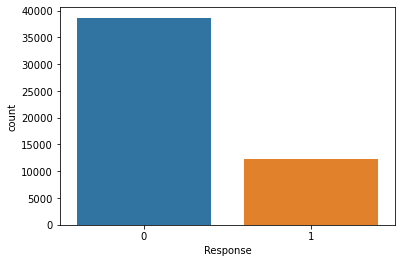

In [31]:
sns.countplot(train_policy['Response'])

In [36]:
train_policy.groupby(['Upper_Age','Lower_Age']).size()

Upper_Age  Lower_Age
18         18            116
19         16              1
           17              1
           18              3
           19            510
20         18              3
           19              8
           20            747
21         16              1
           18              2
           19              4
           20             15
           21           1106
22         16              1
           18              3
           19             13
           20             19
           21             29
           22           1498
23         19              5
           20             11
           21             17
           22             35
           23           1603
24         17              1
           18              1
           20              7
           21             16
           22             12
           23             44
           24           1571
25         17              1
           18              1
           19         

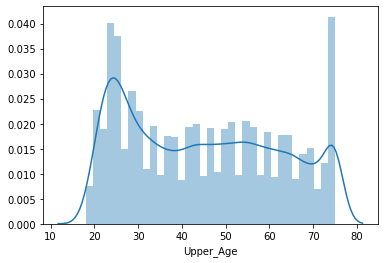

In [37]:
sns.distplot(train_policy['Upper_Age'])

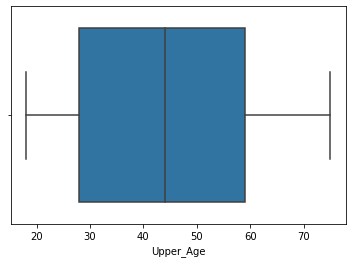

In [38]:
sns.boxplot(train_policy['Upper_Age'])

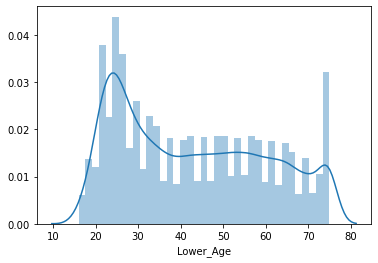

In [39]:
sns.distplot(train_policy['Lower_Age'])

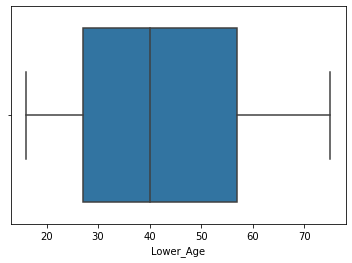

In [40]:
sns.boxplot(train_policy['Lower_Age'])

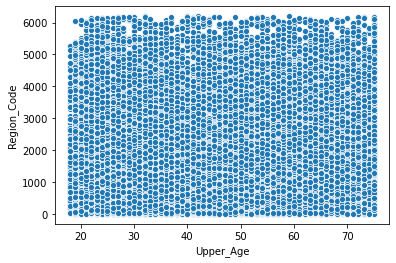

In [41]:
sns.scatterplot(train_policy['Upper_Age'],train_policy['Region_Code'],data=train_policy)

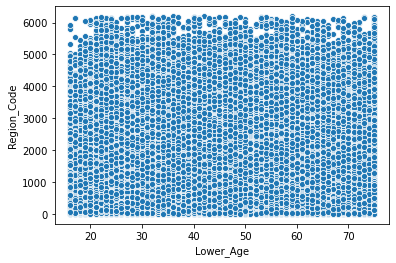

In [42]:
sns.scatterplot(train_policy['Lower_Age'],train_policy['Region_Code'],data=train_policy)

In [43]:
train_policy['Holding_Policy_Type'].unique()

array([3.        , 2.43922823, 1.        , 4.        , 2.        ])

In [44]:
train_policy['Holding_Policy_Type'] = train_policy['Holding_Policy_Type'].astype(int)

In [45]:
train_policy['Holding_Policy_Type'].head()

0    3
1    2
2    1
3    3
4    1
Name: Holding_Policy_Type, dtype: int32

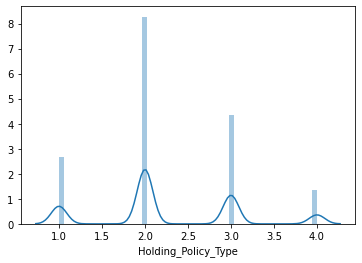

In [48]:
sns.distplot(train_policy['Holding_Policy_Type'])

In [49]:
train_policy.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [54]:
train_policy['Region_Code'].unique()

array([3213, 1117, 3732, ..., 5326, 6149, 5450], dtype=int64)

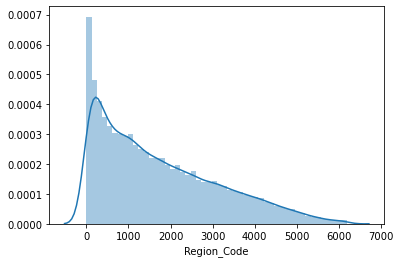

In [55]:
sns.distplot(train_policy['Region_Code'])

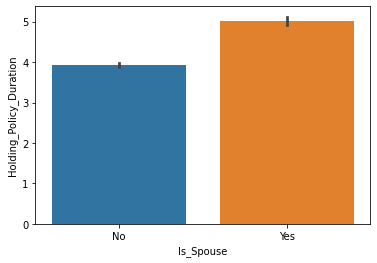

In [56]:
sns.barplot(train_policy['Is_Spouse'],train_policy['Holding_Policy_Duration'],data=train_policy)

In [58]:
train_policy['Holding_Policy_Type'].unique()

array([3, 2, 1, 4])

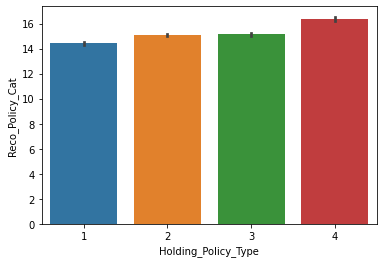

In [60]:
sns.barplot(train_policy['Holding_Policy_Type'],train_policy['Reco_Policy_Cat'])

In [61]:
train_policy['Reco_Policy_Cat'].unique()

array([22, 19, 16, 17,  1, 18, 21, 13, 20,  9,  2,  4, 12,  6, 14, 11,  3,
        8,  7, 10, 15,  5], dtype=int64)

In [66]:
pd.pivot_table(columns=['Is_Spouse','Holding_Policy_Type','Response'],values=['Reco_Policy_Premium'],data=train_policy)

                     Is_Spouse  Holding_Policy_Type  Response
Reco_Policy_Premium  No         1                    0           13271.824920
                                                     1           13345.671437
                                2                    0           11501.661062
                                                     1           11628.280023
                                3                    0           14149.045240
                                                     1           14143.886822
                                4                    0           14270.402137
                                                     1           14350.217323
                     Yes        1                    0           21209.704730
                                                     1           20387.668345
                                2                    0           20896.101586
                                                     1           21188.400463
  

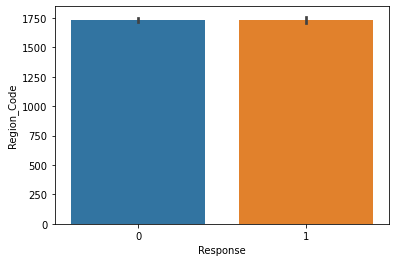

In [67]:
sns.barplot(train_policy['Response'],train_policy['Region_Code'],data=train_policy)

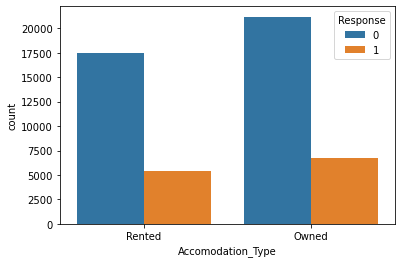

In [71]:
sns.countplot(train_policy['Accomodation_Type'],hue=train_policy['Response'])

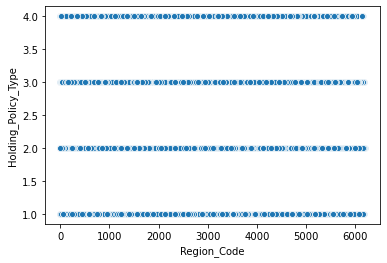

In [75]:
sns.scatterplot(train_policy['Region_Code'],train_policy['Holding_Policy_Type'],data=train_policy)

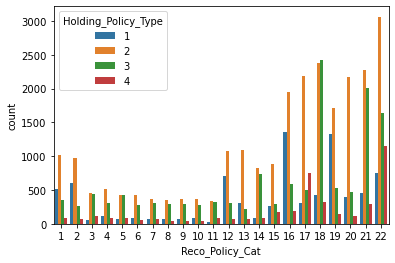

In [79]:
sns.countplot(train_policy['Reco_Policy_Cat'],hue=train_policy['Holding_Policy_Type'])

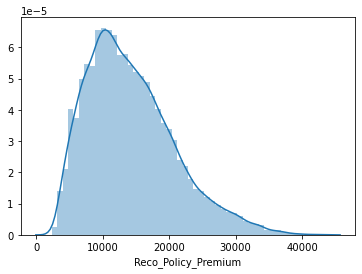

In [63]:
sns.distplot(train_policy['Reco_Policy_Premium'])

In [80]:
train_policy['City_Code'].unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [122]:
test_policy['City_Code'].unique()

array(['C1', 'C4', 'C3', 'C2', 'C13', 'C18', 'C16', 'C17', 'C11', 'C7',
       'C21', 'C34', 'C14', 'C8', 'C12', 'C6', 'C10', 'C9', 'C23', 'C32',
       'C26', 'C15', 'C24', 'C20', 'C19', 'C5', 'C28', 'C30', 'C25',
       'C29', 'C27', 'C33', 'C22', 'C36', 'C35', 'C31'], dtype=object)

In [82]:
Le=LabelEncoder()

In [83]:
train_policy['City_Code'] = Le.fit_transform(train_policy['City_Code'])

In [123]:
test_policy['City_Code'] = Le.fit_transform(test_policy['City_Code'])

In [84]:
train_policy['City_Code'].unique()

array([22, 31, 16, 34, 35,  0,  6, 20, 19, 33, 12, 17, 30, 11, 27,  1,  8,
        9,  7, 21, 26, 18, 10, 32,  3,  4,  2,  5, 14, 15, 13, 29, 25, 23,
       28, 24])

In [124]:
test_policy['City_Code'].unique()

array([ 0, 30, 22, 11,  4,  9,  7,  8,  2, 33, 13, 27,  5, 34,  3, 32,  1,
       35, 15, 25, 18,  6, 16, 12, 10, 31, 20, 23, 17, 21, 19, 26, 14, 29,
       28, 24])

In [85]:
train_policy['Accomodation_Type'] = train_policy['Accomodation_Type'].map( {'Rented': 0, 'Owned': 1} ).astype(int)

In [125]:
test_policy['Accomodation_Type'] = test_policy['Accomodation_Type'].map( {'Rented': 0, 'Owned': 1} ).astype(int)

In [86]:
train_policy['Accomodation_Type'].unique()

array([0, 1])

In [87]:
train_policy['Reco_Insurance_Type'].unique()

array(['Individual', 'Joint'], dtype=object)

In [88]:
train_policy['Reco_Insurance_Type'] = train_policy['Reco_Insurance_Type'].map( {'Individual': 0, 'Joint': 1} ).astype(int)

In [126]:
test_policy['Reco_Insurance_Type'] = test_policy['Reco_Insurance_Type'].map( {'Individual': 0, 'Joint': 1} ).astype(int)

In [89]:
train_policy['Reco_Insurance_Type'].unique()

array([0, 1])

In [90]:
train_policy['Is_Spouse'].unique()

array(['No', 'Yes'], dtype=object)

In [95]:
train_policy['Is_Spouse'] = train_policy['Is_Spouse'].map( {'No': 0, 'Yes': 1} ).astype(int)

In [127]:
test_policy['Is_Spouse'] = test_policy['Is_Spouse'].map( {'No': 0, 'Yes': 1} ).astype(int)

In [96]:
train_policy['Is_Spouse'].unique()

array([0, 1])

In [91]:
train_policy['Health Indicator'].unique()

array(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [128]:
test_policy['Health Indicator'].unique()

array(['X1', 'X3', 'X2', 'X5', 'X4', 'X7', 'X6', 'X9', 'X8'], dtype=object)

In [92]:
train_policy['Health Indicator'] = train_policy['Health Indicator'].replace(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],[1,2,3,4,5,6,7,8,9])

In [129]:
test_policy['Health Indicator'] = test_policy['Health Indicator'].replace(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],[1,2,3,4,5,6,7,8,9])

In [93]:
train_policy['Health Indicator'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [97]:
train_policy.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,0,0,36,36,0,1,15.0,3,22,11628.0,0
1,2,31,1117,1,1,75,22,0,2,1.0,2,22,30510.0,0
2,3,31,3732,1,0,32,32,0,1,1.0,1,19,7450.0,1
3,4,16,4378,1,1,52,48,0,1,15.0,3,19,17780.0,0
4,5,34,2190,0,0,44,44,0,2,3.0,1,16,10404.0,0


In [130]:
test_policy.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,0,156,1,0,30,30,0,1,6.0,3.000000,5,11934.0
1,50884,30,7,1,1,69,68,1,1,3.0,3.000000,18,32204.8
2,50885,0,564,0,0,28,28,0,4,2.0,4.000000,17,9240.0
3,50886,22,1177,0,0,23,23,0,4,3.0,3.000000,18,9086.0
4,50887,0,951,1,0,75,75,0,4,15.0,2.440085,5,22534.0


In [98]:
mm = MinMaxScaler()
train_policy[Num_col] = mm.fit_transform(train_policy[Num_col])

In [131]:
mm = MinMaxScaler()
test_policy[test_Num_col] = mm.fit_transform(test_policy[test_Num_col])

In [99]:
train_policy.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,0.518650,0,0,0.315789,0.338983,0,1,1.000000,0.666667,1.000000,0.227609,0.0
1,2,31,0.180203,1,1,1.000000,0.101695,0,2,0.000000,0.333333,1.000000,0.687356,0.0
2,3,31,0.602454,1,0,0.245614,0.271186,0,1,0.000000,0.000000,0.857143,0.125881,1.0
3,4,16,0.706766,1,1,0.596491,0.542373,0,1,1.000000,0.666667,0.857143,0.377401,0.0
4,5,34,0.353464,0,0,0.456140,0.474576,0,2,0.142857,0.000000,0.714286,0.197807,0.0


In [134]:
X_test = test_policy.drop(['ID'],axis=1)

In [135]:
X_test.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,0,0.025065,1,0,0.210526,0.237288,0,1,0.357143,0.666667,0.190476,0.235009
1,30,0.000970,1,1,0.894737,0.881356,1,1,0.142857,0.666667,0.809524,0.722007
2,0,0.091041,0,0,0.175439,0.203390,0,4,0.071429,1.000000,0.761905,0.170286
3,22,0.190168,0,0,0.087719,0.118644,0,4,0.142857,0.666667,0.809524,0.166587
4,0,0.153622,1,0,1.000000,1.000000,0,4,1.000000,0.480028,0.190476,0.489669


In [104]:
X = train_policy.drop(['ID','Response'],axis=1)

In [105]:
y = train_policy['Response']

In [106]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state = 0)

In [137]:
rf = RandomForestClassifier(n_estimators=51,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=51)

In [138]:
y_pred_train = rf.predict(x_test)
rf.score(x_train,y_train)

0.999868977038226

In [139]:
y_pred_test = rf.predict(X_test)
rf.score(X_test,y_pred_test)

1.0

In [140]:
submission01 = pd.DataFrame({'ID':test_policy['ID'],'Response':y_pred_test})
submission01.head()

,ID,Response
0,50883,0.0
1,50884,0.0
2,50885,0.0
3,50886,0.0
4,50887,0.0


In [142]:
submission01.to_csv("JOB_A_THON_rf01.csv", index=False)